In [1]:
from utils import (
    load_data,
    train_model,
    evaluate_model,
)
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
final_results = {}
for name in ["Sim", "Enhancer"]:
    for rule in ["and", "or", "add"]:
        for ind in tqdm(range(50)):
            for weight_scheme in ['depth', 'samplesize']:
                X, y, y_true = load_data(ind, name, rule)
                y_pred = train_model(X, y, weight_scheme=weight_scheme)
                result = evaluate_model(y_pred, y_true)
                final_results[(name, rule, ind, weight_scheme)] = result

100%|██████████| 50/50 [21:32<00:00, 25.86s/it]


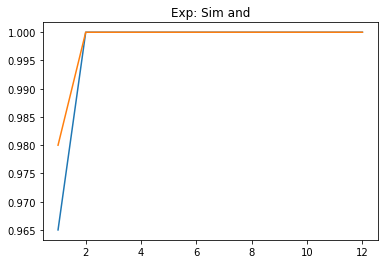

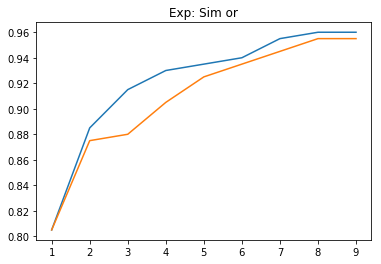

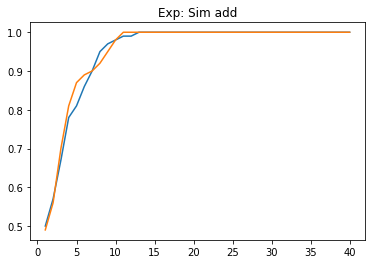

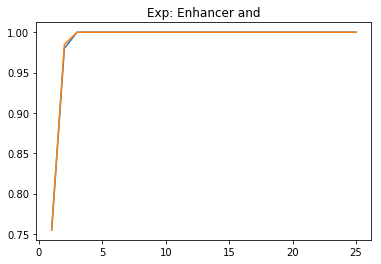

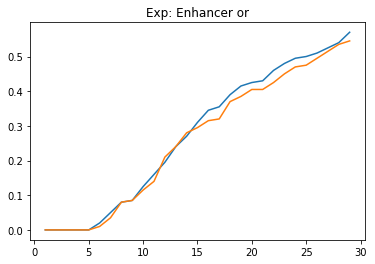

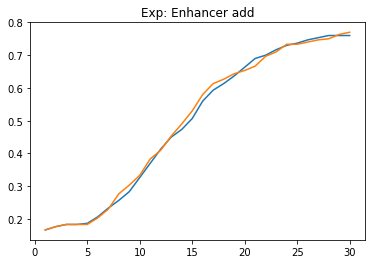

In [3]:
for name in ["Sim", "Enhancer"]:
    for rule in ["and", "or", "add"]:
        plt.figure()
        min_length = np.min([len(v) for x, v in final_results.items() if x[0] == name and x[1] == rule])
        min_length = min(40, min_length)
        plt.errorbar(
            np.arange(1, min_length+1),
            np.mean(np.array([list(v)[:min_length] for x, v in final_results.items() if x[0] == name and x[1] == rule and x[-1] == 'depth']), axis=0),
            #yerr = np.std(np.array([list(v)[:min_length] for x, v in final_results.items() if x[0] == name and x[1] == rule]), axis=0) / 50 ** .5,
        )
        plt.errorbar(
            np.arange(1, min_length+1),
            np.mean(np.array([list(v)[:min_length] for x, v in final_results.items() if x[0] == name and x[1] == rule and x[-1] == 'samplesize']), axis=0),
            #yerr = np.std(np.array([list(v)[:min_length] for x, v in final_results.items() if x[0] == name and x[1] == rule]), axis=0) / 50 ** .5,
        )
        plt.title("Exp: " + name + " " + rule)

In [12]:
## save the result
import pickle
with open("result_" + "whole" + ".pickle", 'wb') as f:
    pickle.dump(final_results, f)